In [2]:
from nufeb_tools import utils,plot
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.signal import find_peaks
from scipy.spatial import KDTree


In [3]:
runs = [r'D:\runs\Run_50_50_100_1_2021-08-04_879890',
        r'D:\runs\Run_50_50_100_1_2021-08-04_749751',
        r'D:\runs\Run_50_50_100_1_2021-08-04_738274',
        r'D:\runs\Run_50_50_100_1_2021-08-04_594614',
        r'D:\runs\Run_50_50_100_1_2021-08-04_584010',
        r'D:\runs\Run_50_50_100_1_2021-08-04_548827',
        r'D:\runs\Run_50_50_100_1_2021-08-04_462847',
        r'D:\runs\Run_50_50_100_1_2021-08-04_369407',
        r'D:\runs\Run_50_50_100_1_2021-08-04_262947',
        r'D:\runs\Run_50_50_100_1_2021-08-04_174205'
        ]
data = list()
for run in runs:
    data.append(utils.get_data(directory= run))


In [4]:
mus = list()
mmu = list()
for d in data:
    mus.append(d.metadata['ecw']['GrowthRate'])
    mmu.append(d.metadata['ecw']['GrowthRate']/d.metadata['cyano']['GrowthRate'])
d2 = [x for _, x in sorted(zip(mus, data))]
mu2 = sorted(mus)
dmu = sorted(mmu)

In [5]:
Ratio = [x.biomass.iloc[-1,2]/x.biomass.iloc[-1,1] for x in d2]
Ratio

[0.014964992858604774,
 0.16299885479538476,
 1.555614691536157,
 2.3707065680191985,
 2.320603602270105,
 2.326836702551923,
 2.2433196825767743,
 2.495540053850117,
 2.403914520144982,
 2.516950650487011]

In [ ]:
gr = mu2

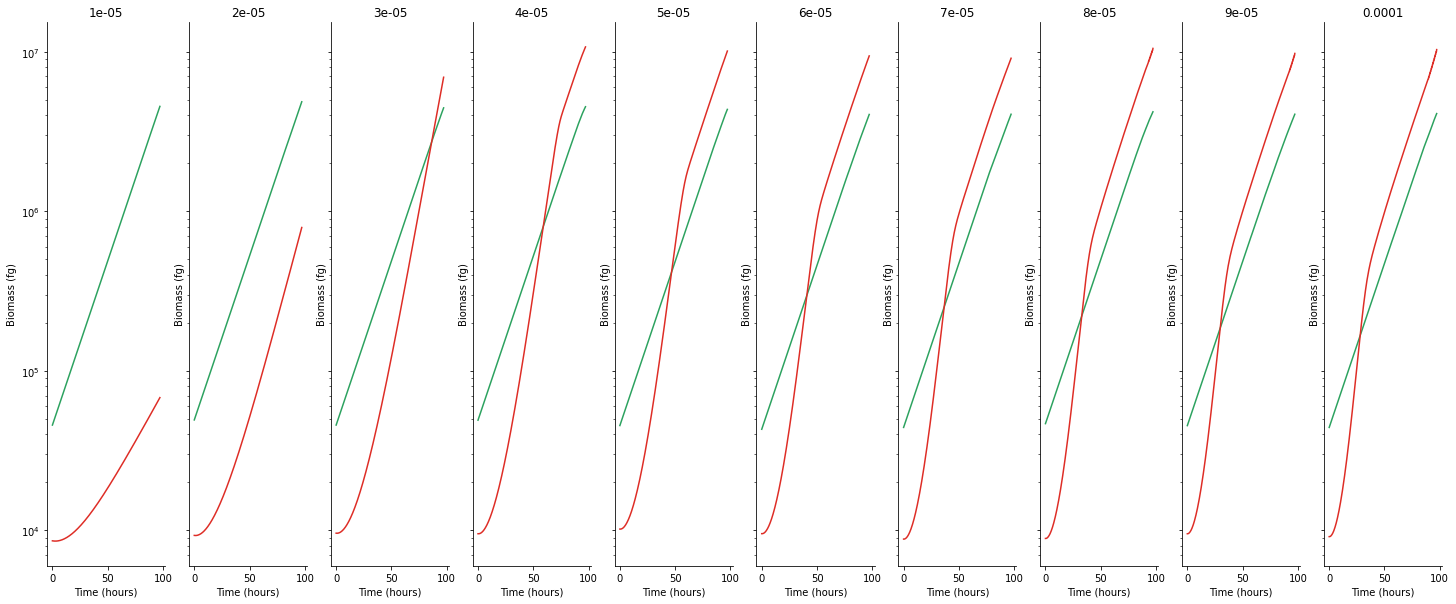

In [6]:
f, axes = plt.subplots(ncols=len(d2),figsize=(25,10),sharex=True,sharey=True)
for ax, d,mu in zip(axes,d2,mu2):
    plot.overall_growth(d.biomass,ax=ax)
    ax.get_legend().remove()
    ax.set_title(mu)


Text(0, 0.5, 'Cell ratio $\\frac{Biomass_{ec}}{Biomass_{se}}$')

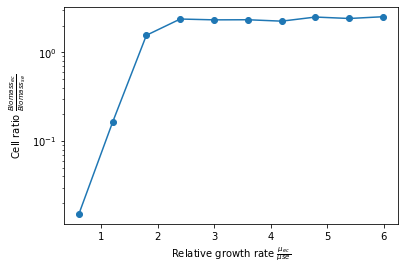

In [7]:
f, ax = plt.subplots()
ax.plot(dmu,Ratio,marker='o')
#ax.set(xscale="log")
ax.set(yscale="log")
ax.set_xlabel(r'Relative growth rate $\frac{\mu_{ec}}{\mu{se}}$')
ax.set_ylabel(r'Cell ratio $\frac{Biomass_{ec}}{Biomass_{se}}$')

In [4]:
Ratio = [x.biomass.iloc[-1,2]/x.biomass.iloc[-1,1] for x in [low,med,high]]
labels = ['low','med','high']
colors = ['#fee6ce','#fdae6b','#e6550d']
cons = [low,med,high]
ss_time = list()
suc_max = list()
suc_end = list()
for con in cons:
    difference = np.diff(con.avg_con['Sucrose'].values,prepend=0)
    ss_time.append(con.avg_con.index[np.argmin(difference)])
    suc_max.append(con.avg_con['Sucrose'].max())
    suc_end.append(con.avg_con['Sucrose'].iloc[-10:].mean())

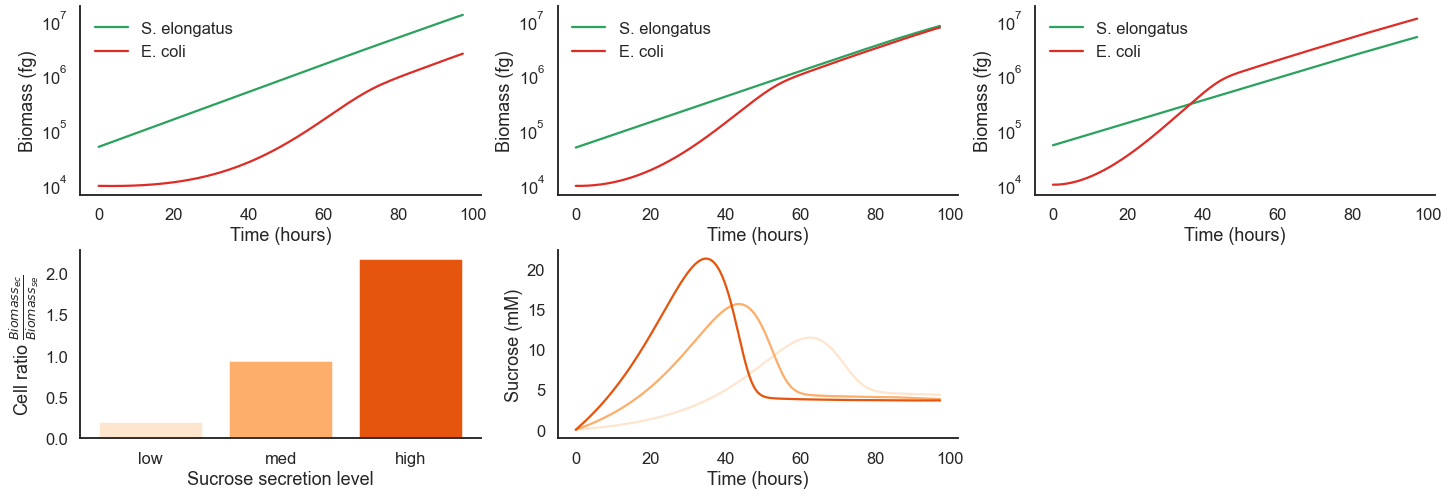

In [5]:
fig = plt.figure(constrained_layout=True, figsize=(20,12))
gs0 = gridspec.GridSpec(4, 3, figure=fig)
sns.set_context('talk')
sns.set_style('white')

ax1 = fig.add_subplot(gs0[0, 0])
ax2 = fig.add_subplot(gs0[0, 1],sharey=ax1)
ax3 = fig.add_subplot(gs0[0, 2],sharey=ax1)
ax4 = fig.add_subplot(gs0[1,0])
ax5 = fig.add_subplot(gs0[1,1])
plot.overall_growth(low.biomass,ax=ax1)
plot.overall_growth(med.biomass,ax=ax2)
plot.overall_growth(high.biomass,ax=ax3)
ax4.bar(labels,Ratio,color=colors)
ax4.set_xlabel('Sucrose secretion level')
ax4.set_ylabel(r'Cell ratio $\frac{Biomass_{ec}}{Biomass_{se}}$')
#ax4.set_yscale('log')
plot.average_nutrients(low.avg_con,'Sucrose',color='#fee6ce',ax=ax5)
plot.average_nutrients(med.avg_con,'Sucrose',color='#fdae6b',ax=ax5)
plot.average_nutrients(high.avg_con,'Sucrose',color='#e6550d',ax=ax5)

ax5.set_ylabel('Sucrose (mM)')
sns.despine()

259
190
157


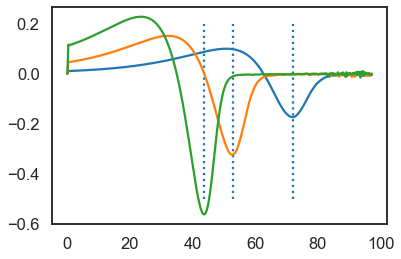

In [15]:
cons = [low,med,high]
ss_time = list()
suc_max = list()
suc_end = list()
f,ax = plt.subplots()
for con in cons:
    difference = np.diff(con.avg_con['Sucrose'].values,prepend=0)#np.diff(con.avg_con['Sucrose'],prepend=0,n=20)
    #pks,_ = find_peaks(difference,distance=50,height=.005)
    #idx = [con.avg_con.index[x] for x in pks]
    ax.plot(con.avg_con.index,difference)
    ax.vlines(con.avg_con.index[np.argmin(difference)],-0.5,0.2,ls=':')
    ss_time.append(con.avg_con.index[np.argmin(difference)])
    suc_max.append(con.avg_con['Sucrose'].max())
    suc_end.append(con.avg_con['Sucrose'].iloc[-10:].mean())
    print(np.argmin(difference))
    #ax.scatter(idx,difference[pks])
#plot.average_nutrients(low.avg_con,'Sucrose',color='#fee6ce',ax=ax)

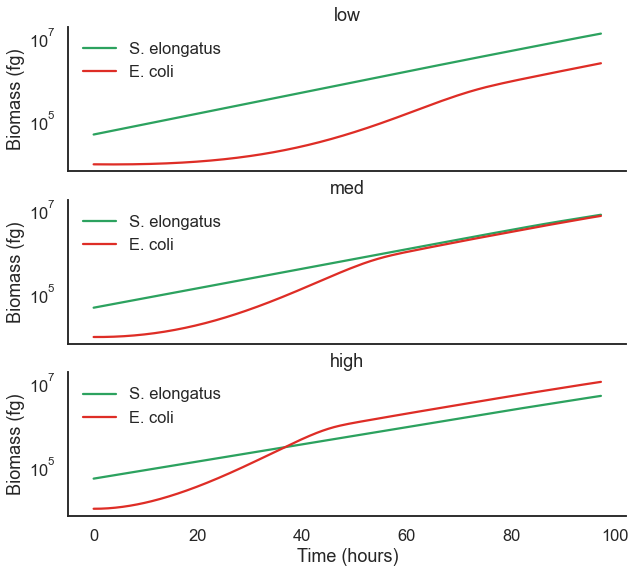

In [7]:
sns.set_context('talk')
sns.set_style('white')
f, axes = plt.subplots(nrows=3,sharex=True,sharey=True,figsize=(10,9))
plot.overall_growth(low.biomass,ax=axes[0])
plot.overall_growth(med.biomass,ax=axes[1])
plot.overall_growth(high.biomass,ax=axes[2])
#axes[2].set_ylabel('Sucrose (mM)')
for ax in axes[:2]:
    ax.set_xlabel('')
for i,ax in enumerate(axes):
    ax.set_title(labels[i])
sns.despine()
f.savefig('Growth curves l-m-h.png',dpi=600)

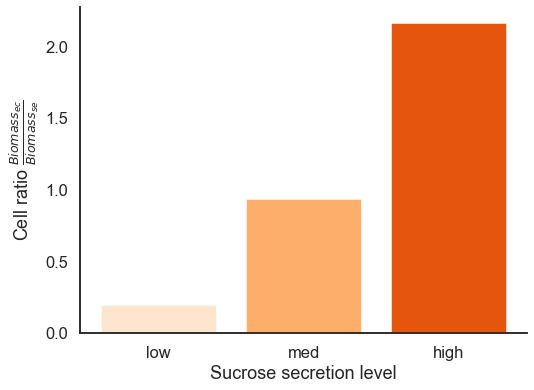

In [8]:
sns.set_context('talk')
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
ax.bar(labels,Ratio,color=colors)
ax.set_xlabel('Sucrose secretion level')
ax.set_ylabel(r'Cell ratio $\frac{Biomass_{ec}}{Biomass_{se}}$')
sns.despine()
f.savefig('cell ratio.png',dpi=600)

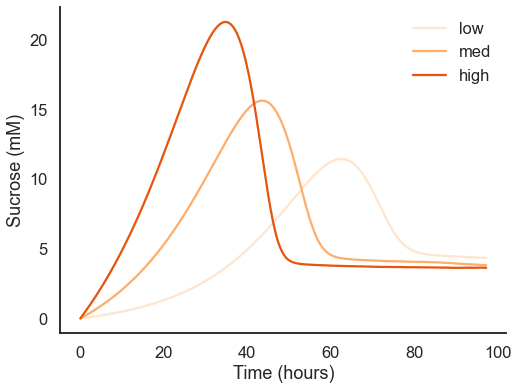

In [9]:
sns.set_context('talk')
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
plot.average_nutrients(low.avg_con,'Sucrose',color='#fee6ce',ax=ax)
plot.average_nutrients(med.avg_con,'Sucrose',color='#fdae6b',ax=ax)
plot.average_nutrients(high.avg_con,'Sucrose',color='#e6550d',ax=ax)
ax.legend(labels,frameon=False)
ax.set_ylabel('Sucrose (mM)')
sns.despine()
f.savefig('Sucrose v time.png',dpi=600)

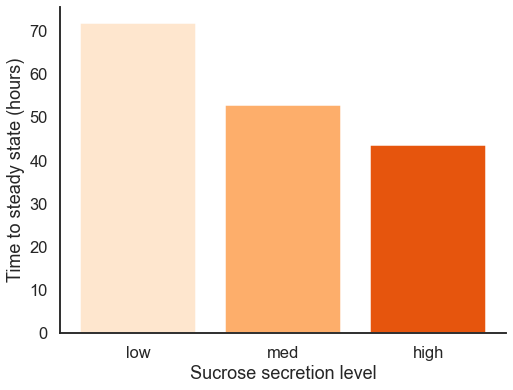

In [10]:
sns.set_context('talk')
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
ax.bar(labels,ss_time,color=colors)
ax.set_xlabel('Sucrose secretion level')
ax.set_ylabel('Time to steady state (hours)')
sns.despine()
f.savefig('ss time.png',dpi=600)

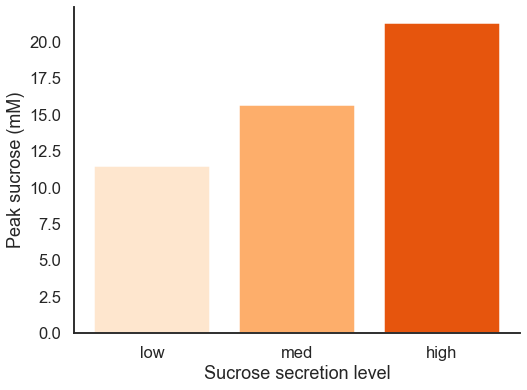

In [11]:
sns.set_context('talk')
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
ax.bar(labels,suc_max,color=colors)
ax.set_xlabel('Sucrose secretion level')
ax.set_ylabel('Peak sucrose (mM)')
sns.despine()
f.savefig('suc max.png',dpi=600)

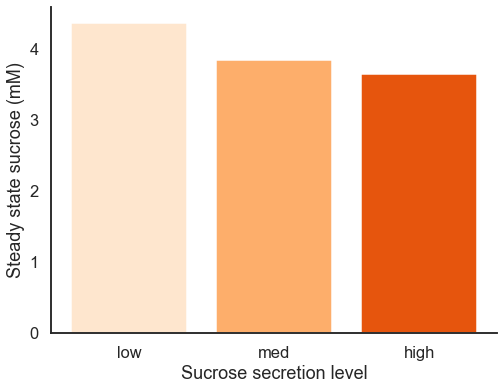

In [12]:
sns.set_context('talk')
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
ax.bar(labels,suc_end,color=colors)
ax.set_xlabel('Sucrose secretion level')
ax.set_ylabel('Steady state sucrose (mM)')
sns.despine()
f.savefig('ss suc.png',dpi=600)

C:\Users\Jonathan\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Jonathan\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Jonathan\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

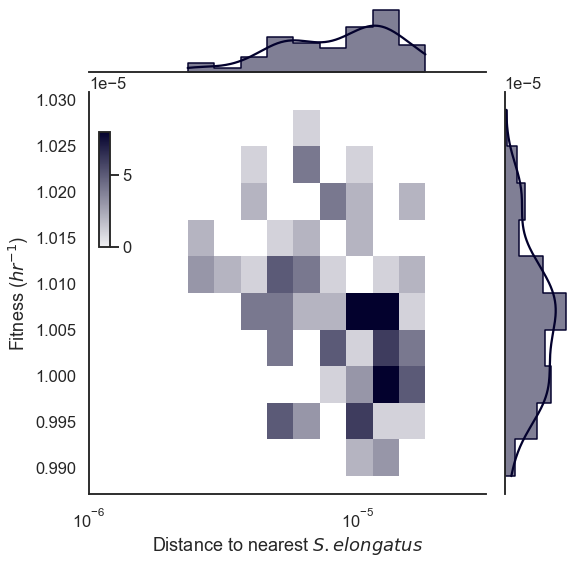

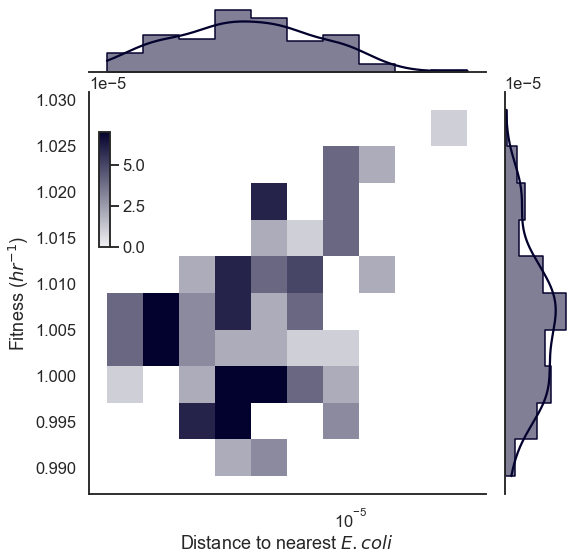

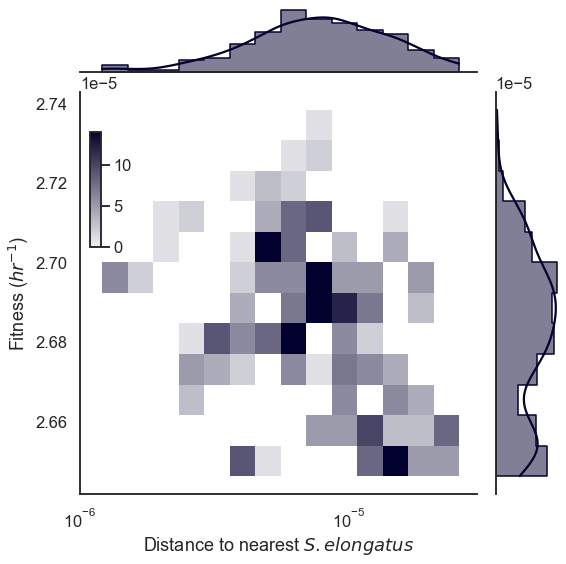

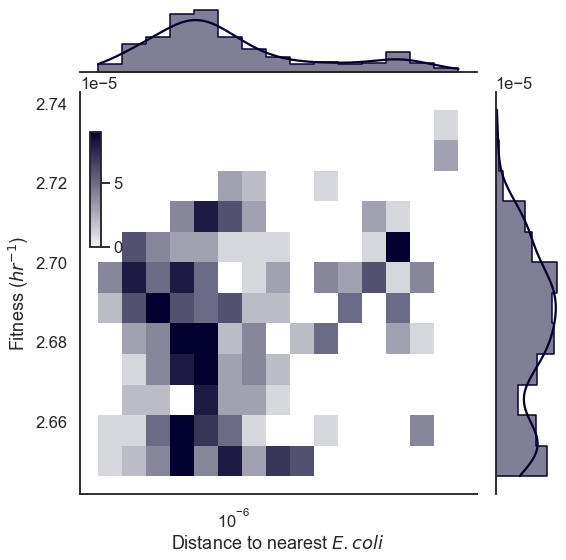

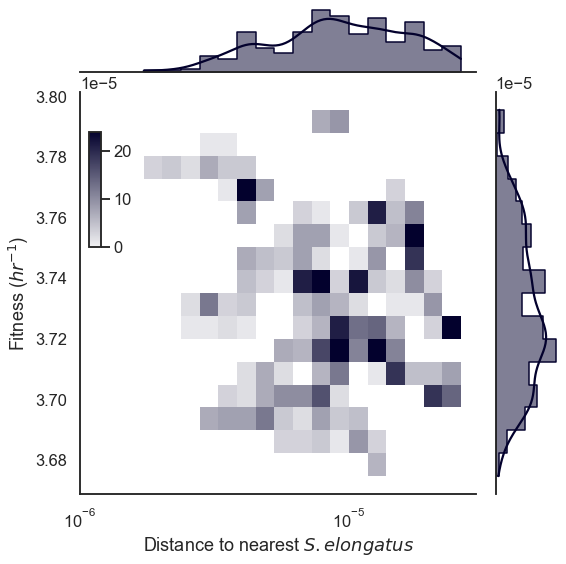

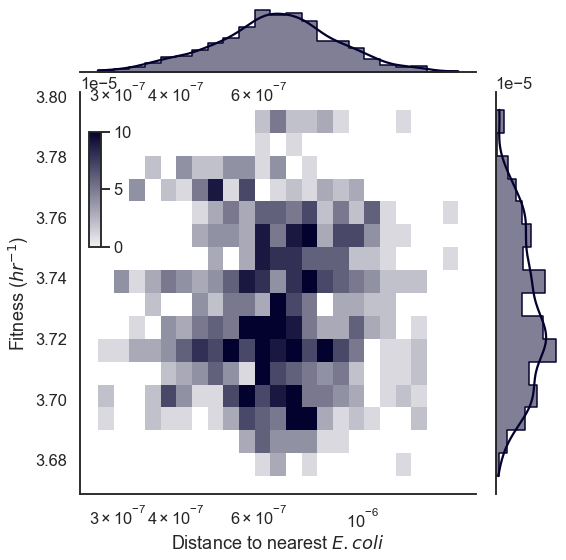

In [228]:
for con,label in zip(cons,labels):
    cell_df = con.colonies
    fitness = list()
    timepoint =10000
    neighbors = 6
    tp1 = cell_df[(cell_df.Timestep==timepoint) & (cell_df.type==1)]
    tp2 = cell_df[(cell_df.Timestep==timepoint) & (cell_df.type==2)]
    arr1 = tp1[['x','y']].to_numpy()
    arr2 = tp2[['x','y']].to_numpy()
    tree1 = KDTree(arr1)
    tree2 = KDTree(arr2)
    dd1_1, ii1_1 = tree1.query(arr1, k=neighbors)
    dd1_2, ii1_2 = tree1.query(arr2, k=neighbors)
    dd2_1, ii2_1 = tree2.query(arr1, k=neighbors)
    dd2_2, ii2_2 = tree2.query(arr2, k=neighbors)
    for cell in sorted(cell_df[(cell_df.Timestep==timepoint)].ID):
        fit = con.get_fitness(timepoint,cell)
        fitness.append(fit)
    tp1.loc[:,'Distance_1'] = np.mean(dd1_1[:,1:],axis=1)
    tp1.loc[:,'Distance_2'] = np.mean(dd2_1[:,1:],axis=1)
    tp2.loc[:,'Distance_1'] = np.mean(dd1_2[:,1:],axis=1)
    tp2.loc[:,'Distance_2'] = np.mean(dd2_2[:,1:],axis=1)
    df1 = pd.concat([tp1,tp2])
    df1 = df1.sort_values(by='ID')
    df1 = df1.reset_index(drop=True)
    df1['Fitness']= fitness
    # plots
    g = sns.JointGrid(data=df1[df1.type==2], x="Distance_1", y="Fitness",height=8,space=0.3)
    g.ax_joint.set(xscale="log")
    g.ax_joint.set_xlim(1e-6,3e-5)
    #g.ax_joint.set_ylim(0.9e-5,4e-5)
    cax = g.fig.add_axes([.15, .55, .02, .2])
    g.plot_joint(
        sns.histplot, 
        cmap="light:#03012d", cbar=True, cbar_ax=cax,pmax=.8)
    g.plot_marginals(sns.histplot, element="step", color="#03012d",kde=True)
    g.ax_joint.set_xlabel(r'Distance to nearest $\it{S. elongatus}$')
    g.ax_joint.set_ylabel(r'Fitness ($hr^{-1}$)')
    g.fig.savefig(f'ec-se dist {label}.png',dpi=600)

    g = sns.JointGrid(data=df1[df1.type==2], x="Distance_2", y="Fitness",height=8,space=0.3)
    g.ax_joint.set(xscale="log")
    cax = g.fig.add_axes([.15, .55, .02, .2])
    g.plot_joint(
        sns.histplot, 
        cmap="light:#03012d", cbar=True, cbar_ax=cax,pmax=.8)
    g.plot_marginals(sns.histplot, element="step", color="#03012d",kde=True)
    g.ax_joint.set_xlabel(r'Distance to nearest $\it{E. coli}$')
    g.ax_joint.set_ylabel(r'Fitness ($hr^{-1}$)')
    g.fig.savefig(f'ec-ec dist {label}.png',dpi=600)



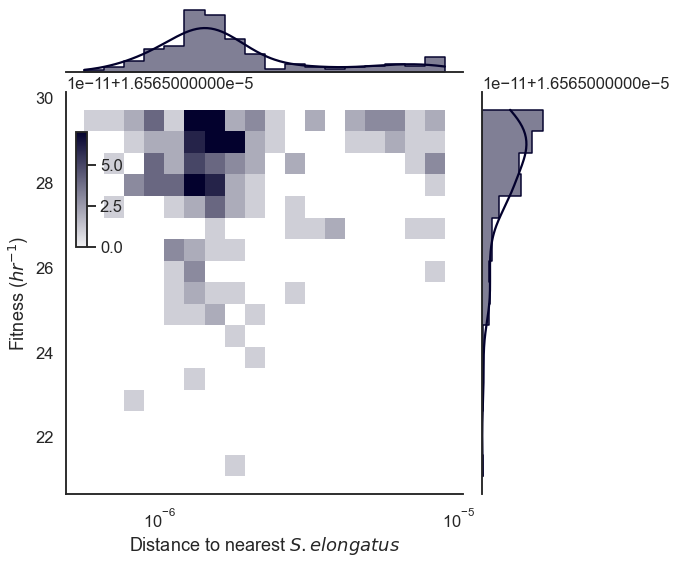

In [227]:
g = sns.JointGrid(data=df1[df1.type==1], x="Distance_1", y="Fitness",height=8,space=0.3)
g.ax_joint.set(xscale="log")

cax = g.fig.add_axes([.15, .55, .02, .2])
g.plot_joint(
    sns.histplot, 
    cmap="light:#03012d", cbar=True, cbar_ax=cax,pmax=.8)
g.plot_marginals(sns.histplot, element="step", color="#03012d",kde=True)
g.ax_joint.set_xlabel(r'Distance to nearest $\it{S. elongatus}$')
g.ax_joint.set_ylabel(r'Fitness ($hr^{-1}$)')
g.fig.savefig('se dist.png',dpi=600)

Text(32.625, 0.5, 'Fitness ($hr^{-1}$)')

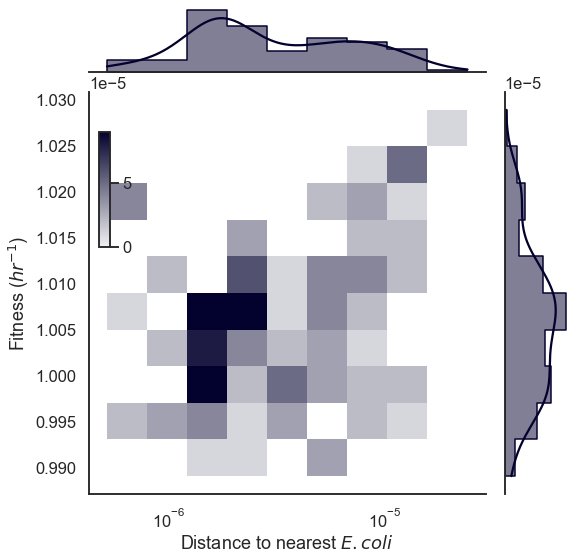

In [221]:
g = sns.JointGrid(data=df1[df1.type==2], x="Distance_2", y="Fitness",height=8,space=0.3)
g.ax_joint.set(xscale="log")
cax = g.fig.add_axes([.15, .55, .02, .2])
g.plot_joint(
    sns.histplot, 
    cmap="light:#03012d", cbar=True, cbar_ax=cax,pmax=.8)
g.plot_marginals(sns.histplot, element="step", color="#03012d",kde=True)
g.ax_joint.set_xlabel(r'Distance to nearest $\it{E. coli}$')
g.ax_joint.set_ylabel(r'Fitness ($hr^{-1}$)')